In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

# Задача - прогноз уязвимости устройства на основе его характеристик
Перед Вами данные с характеристиками различных устройств, чья операционная система может содержать вредоносный код. Основаываясь на характеристиках устройств необходимо построить модель, которая максимально точно предскажет наличие вредоноса на отложенной выборке. Получившиеся результаты (вероятность наличия вируса на устройстве) необходимо подставить в датасет df_submission и отправить обратно для проверки обощающей способности модели.

In [2]:
X_train = pd.read_csv(r'train.csv')
X_test = pd.read_csv(r'test.csv')
df_sbmission = pd.read_csv(r'submission.csv')

```
machine_id - идентификатор устройства
device_os_version - версия текущей операционной системы
device_os_full_name - версия операционной системы (полное название)
device_os_build - сборка текущей операционной системы
device_os_build_revision - версия операционной системы детальная
device_os_build_lab - сборка, сгенерированная под текущую версию операционной системы
device_os_suite - верия ПО в текущей операционной системе
device_os_platform_name - название платформы
device_os_platform_subrelease - релиз версии операционной системы
device_os_architecture - архитектура операционной системы
device_os_sku_name - пользовательское наименование вида операционной системы
device_os_install_type_name - пользовательское наименование типа установки ПО на устройстве
device_os_autoupdate_option_name - пользовательское наименование настроек автообновления Windows
device_os_is_portable - портабельная версия операционной системы
device_is_protected - работоспособность антивируса
device_is_cloud_defence_enabled - включена ли в антивирусе облачная защита
device_is_pua_mode_enabled - включеная ли блокировка потенциально нежелательных приложений
device_is_smode_enabled - включен ли режим SMode
device_is_smart_screen_enabled - включен ли режим SmartScreen
device_is_firewall_enabled - включен ли Firewall
device_is_uac_enabled - включен ли User Account Control
device_sku_edition - вид операционной системы
device_form_factor_type - тип консоли
device_family - тип девайса
device_cpu_architecture - архитектура процессора
device_cpu_count - количество ядер в процессоре
device_cpu_class - классификация процессоров
device_system_disk_total_capacity - количество свободного места на системной диске в МБ
device_system_disk_type_name - тип дискового пространства
device_system_volume_total_capacity - место, занимаемое системой в МБ
device_has_optical_disk_drive - есть ли оптический привод
device_total_physical_ram - оперативная память в МБ
device_chassis_type_name - тип устройства
device_primary_display_monitor_size_inches - размер диагонали основного экрана
deivce_primary_display_horizonal_resolution - количество пикселей в горизонатльном представлении основного экрана
deivce_primary_display_vertical_resolution - количество пикселей в вертикальном представлении основного экрана
device_power_platform_name - идентификатор профиля оригинального производителя оборудования
device_genuine_state_name - пользовательское наименование проверки подлинности операционной системы
device_activation_channel - лицензионный ключ устройства
device_locale_id - название стандартной локали
device_is_secure_boot_enabled - включен ли режим защиты устройства
device_is_virtual - является ли виртуальной машиной
device_is_touched_enabled - есть ли тач-пад на устройстве
device_is_pen_capable - есть ли возможность работать с пером на устройстве
device_is_always_on_connected_capable - есть ли у устройства возможно постоянно быть в активном состоянии
device_is_gaming - устройство приспособлено для геймеров
device_defender_product_name - наименование защитного ПО
device_defender_engine_version - выпуск защитного ПО
device_defender_app_version - версия защитного ПО
device_defender_av_sig_version - спецификация защитного ПО
device_defender_is_beta - бета версия защитного ПО
device_default_browser_id - идентификтор браузера ПК по-умолчанию
device_antivirus_product_id - идентификатор пользовательской конфигурации антивируса
device_has_cryptogrpahic - есть ли криптогарфическое шифрование
device_country_id - идентификтор страны расположения
device_city_id - идентификтор города расположения
device_organization_id - идентификатор организации
device_geo_id - идентификатор геолокации
```

In [3]:
X_train['is_infected'].value_counts()

0    401638
1    401295
Name: is_infected, dtype: int64

In [4]:
train, val, y_train, y_val = train_test_split(X_train.drop('is_infected', axis=1), X_train['is_infected'], 
                                                    test_size=0.3, random_state=42) 

In [5]:
from sklearn.ensemble import RandomForestClassifier
from category_encoders import JamesSteinEncoder

In [6]:
type_col = train.dtypes
cat_cols = list(type_col[(type_col == 'object')].index)
num_cols = list(type_col[~(type_col == 'object')].index)

In [7]:
cat_cols.remove('machine_id')

In [8]:
js = JamesSteinEncoder()
train_js = js.fit_transform(train[cat_cols], y_train)
val_js = js.transform(val[cat_cols])

In [9]:
train_new = train[num_cols].join(train_js)
val_new = val[num_cols].join(val_js)

In [10]:
clf = RandomForestClassifier(n_estimators=50, random_state=0) #max_depth=2, 

In [11]:
clf.fit(train_new.fillna(-999), y_train)

RandomForestClassifier(n_estimators=50, random_state=0)

In [12]:
pred = clf.predict(val_new.fillna(-999))

In [13]:
roc_auc_score(y_val, pred)

0.6349451988983769

In [ ]:
###

In [14]:
X_train['part'] = 'train'
X_test['part'] = 'test'
df = pd.concat([X_train, X_test])

In [15]:
for feature in cat_cols:
    encoder = preprocessing.LabelEncoder()
    df[feature] = encoder.fit_transform(df[feature])

In [16]:
X_train_code = df[df['part'] == 'train']
X_test_code = df[df['part'] == 'test']

In [17]:
train, val, y_train, y_val = train_test_split(X_train_code.drop(['is_infected','part'], axis=1), X_train_code['is_infected'], 
                                                    test_size=0.3, random_state=42) 

In [18]:
clf.fit(train.iloc[:,1:].fillna(-999), y_train)

RandomForestClassifier(n_estimators=50, random_state=0)

In [19]:
pred = clf.predict(val.iloc[:,1:].fillna(-999))
roc_auc_score(y_val, pred)

0.6356644909158217

In [20]:
import catboost

In [21]:
boosting_model = catboost.CatBoostClassifier(n_estimators=100, silent=True,
                                             eval_metric='AUC', cat_features=cat_cols)#, l2_leaf_reg=0.05, max_depth=3, learning_rate=0.05)

In [22]:
boosting_model.fit(train.iloc[:,1:].fillna(-999), y_train)
pred = boosting_model.predict_proba(val.iloc[:,1:].fillna(-999))[:,1]

In [23]:
roc_auc_score(y_val, pred)

0.7139799913734906

In [24]:
feat_imp = pd.DataFrame({i:[j] for i, j in zip(boosting_model.feature_names_, boosting_model.feature_importances_)}).T

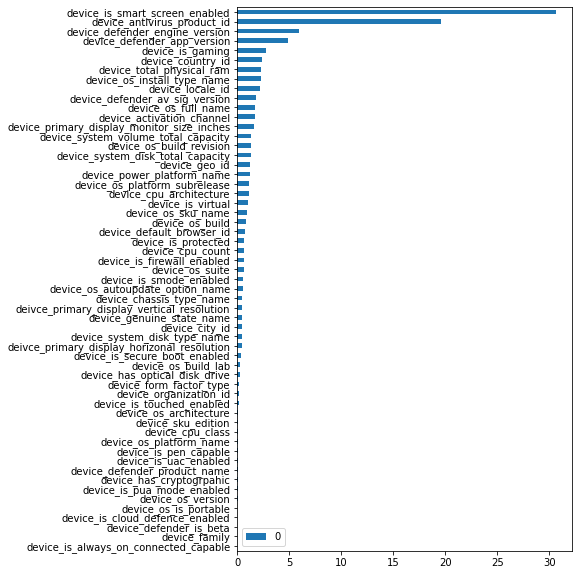

In [25]:
feat_imp.sort_values(0).plot(kind='barh', figsize=(6, 10));

In [26]:
drop_cols = feat_imp[feat_imp[0] == 0].index

In [27]:
cat_cols_new = cat_cols.copy()
for i in drop_cols:
    if i in cat_cols_new:
        cat_cols_new.remove(i)

In [32]:
boosting_model = catboost.CatBoostClassifier(n_estimators=200, silent=True,
                                             eval_metric='AUC', cat_features=cat_cols_new)#, l2_leaf_reg=0.05, max_depth=3, learning_rate=0.05)

In [33]:
boosting_model.fit(train.iloc[:,1:].drop(drop_cols, axis=1).fillna(-999), y_train)
pred = boosting_model.predict_proba(val.iloc[:,1:].drop(drop_cols, axis=1).fillna(-999))[:,1]
roc_auc_score(y_val, pred)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0.7185524804861798

In [37]:
new_boosting_model = catboost.CatBoostClassifier(n_estimators=200, silent=True,
                                             eval_metric='AUC')

In [41]:
new_boosting_model.fit(train.iloc[:,1:].fillna(-999), y_train)
new_pred = new_boosting_model.predict_proba(val.iloc[:,1:].fillna(-999))[:,1]
roc_auc_score(y_val, new_pred)

0.7192766337754025

In [44]:
new_boosting_model.fit(X_train_code[train.iloc[:,1:].columns].fillna(-999), X_train_code['is_infected'])

In [45]:
test_pred = new_boosting_model.predict_proba(X_test_code[train.iloc[:,1:].columns].fillna(-999))[:,1]

In [49]:
df_sbmission['is_infected'] = test_pred

In [51]:
df_sbmission.to_csv('my_sub_clf.csv')